### #1 - Initialization and Library Imports
#### Loading all Python libraries that will be used during the data analysis and visualization process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

print("The library was imported successfully.")

The library was imported successfully.


### #2 - Test Parameter Configuration
#### Defining all main variables such as data location, server names, and client load scenarios.

In [2]:
BASE_DATA_PATH = '..' 

SERVERS = ['nodejs-ws', 'nodejs-socketio', 'golang-gorilla', 'golang-coder'] 

CLIENT_LOADS = [100, 200, 400, 600, 800, 1000]

print("Configuration ready.")

Configuration ready.


### #3 - Data Loading and Aggregation
#### Finding, reading, and combining all resulting CSV files into three main datasets (DataFrames) for each metric.

In [3]:
def load_data(metric_prefix):
    """Reads all CSV files for a single metric from all subfolders and combines them."""
    all_files = []
    print(f"\n--- Loading data for metric: {metric_prefix} ---")
    
    for server in SERVERS:
        for load in CLIENT_LOADS:
            search_pattern = os.path.join(BASE_DATA_PATH, '**', f"{metric_prefix}_{server}_{load}clients*.csv")
            
            found_files = glob.glob(search_pattern, recursive=True)

            if not found_files:
                print(f"Warning: File not found for {server} @ {load} clients (pattern: {search_pattern})")
                continue
            
            filepath = found_files[0]
            print(f"Reading file: {os.path.relpath(filepath)}") 
            
            df = pd.read_csv(filepath)
            df['server'] = server.replace('-', ' ').title()
            df['client_load'] = load
            all_files.append(df)
    
    if not all_files:
        print(f"Error: No data could be loaded for metric '{metric_prefix}'")
        return pd.DataFrame()

    return pd.concat(all_files, ignore_index=True)

rtt_df = load_data('rtt')
throughput_df = load_data('throughput')
conn_df = load_data('conn-time')

print("\n--- Data Loading Summary ---")
print(f"RTT data loaded successfully: {len(rtt_df)} rows")
print(f"Throughput data loaded successfully: {len(throughput_df)} rows")
print(f"Connection Time data loaded successfully: {len(conn_df)} rows")


--- Loading data for metric: rtt ---
Reading file: ../client-simulator/rtt_nodejs-ws_100clients.csv
Reading file: ../client-simulator/rtt_nodejs-ws_200clients.csv
Reading file: ../client-simulator/rtt_nodejs-ws_400clients.csv
Reading file: ../client-simulator/rtt_nodejs-ws_600clients.csv
Reading file: ../client-simulator/rtt_nodejs-ws_800clients.csv
Reading file: ../client-simulator/rtt_nodejs-ws_1000clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_100clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_200clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_400clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_600clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_800clients.csv
Reading file: ../client-simulator/rtt_nodejs-socketio_1000clients.csv
Reading file: ../client-simulator/rtt_golang-gorilla_100clients.csv
Reading file: ../client-simulator/rtt_golang-gorilla_200clients.csv
Reading file: ../client-simulato

### #4 - Metric 1 Analysis: Round Trip Time (RTT)
#### Calculating descriptive statistics and creating visualizations for the RTT (ms) metric.

In [4]:
rtt_summary = rtt_df.groupby(['server', 'client_load'])['RTT_MS'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

print("--- RTT Statistics Summary ---")
print(rtt_summary)

--- RTT Statistics Summary ---
             server  client_load       mean  median        std    min      max
0      Golang Coder          100   1.909877   1.804   0.527420  0.043   14.346
1      Golang Coder          200   3.812474   3.455   1.449960  0.040   89.740
2      Golang Coder          400   7.742549   7.980   1.857733  0.038   26.273
3      Golang Coder          600  11.568815  12.470   3.154304  0.045   33.937
4      Golang Coder          800  15.843399  17.670   5.001900  0.036   43.487
5      Golang Coder         1000  18.966141  21.502   6.525126  0.041   52.531
6    Golang Gorilla          100   1.872928   1.807   0.477231  0.045   14.534
7    Golang Gorilla          200   3.681077   3.629   0.861308  0.041   14.113
8    Golang Gorilla          400   7.602442   7.849   1.866075  0.039   27.502
9    Golang Gorilla          600  11.319914  12.229   3.184484  0.042   36.754
10   Golang Gorilla          800  15.115560  16.914   4.759949  0.043   44.987
11   Golang Gorilla  

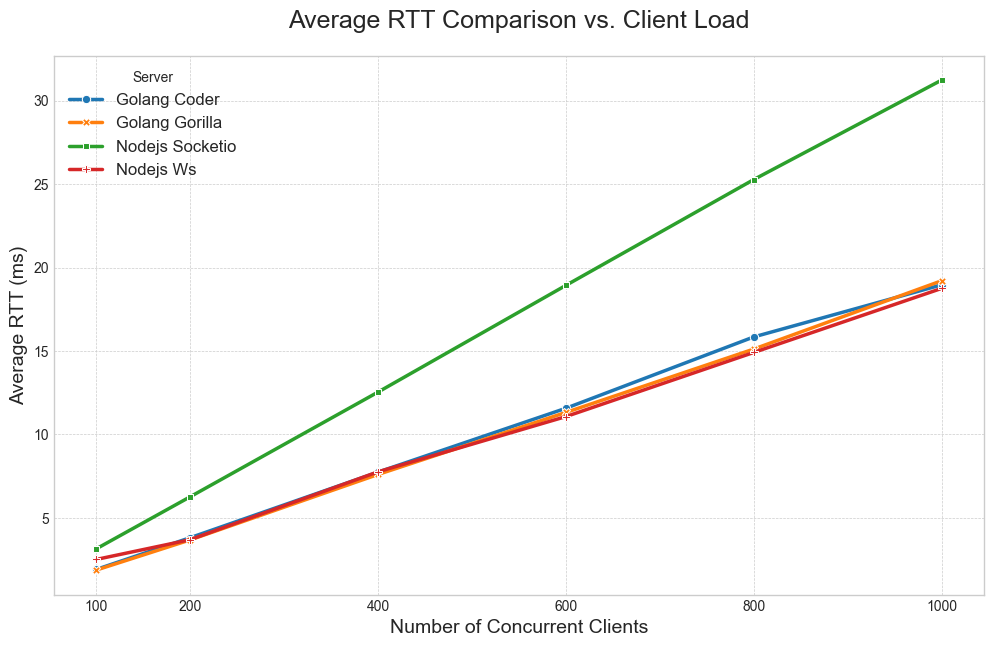

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.lineplot(data=rtt_summary, x='client_load', y='mean', hue='server', style='server', markers=True, dashes=False, lw=2.5)

plt.title('Average RTT Comparison vs. Client Load', fontsize=18, pad=20)
plt.xlabel('Number of Concurrent Clients', fontsize=14)
plt.ylabel('Average RTT (ms)', fontsize=14)
plt.legend(title='Server', fontsize=12)

plt.xticks(CLIENT_LOADS)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("rtt_comparison.png")
plt.show()

### #5 - Metric 2 Analysis: Throughput
#### Calculating descriptive statistics and creating visualizations for the Throughput (msg/s) metric.

In [6]:
throughput_summary = throughput_df[throughput_df['THROUGHPUT_MSGS_PER_SEC'] > 0].groupby(['server', 'client_load'])['THROUGHPUT_MSGS_PER_SEC'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

print("--- Throughput Statistics Summary ---")
print(throughput_summary)

--- Throughput Statistics Summary ---
             server  client_load          mean   median          std    min  \
0      Golang Coder          100  50580.253968  51337.0  5764.352363   9070   
1      Golang Coder          200  50081.953846  51055.0  4457.130679  22816   
2      Golang Coder          400  47532.228571  48315.5  6255.866407   4555   
3      Golang Coder          600  46278.746667  46957.0  6510.615486   4181   
4      Golang Coder          800  43984.913580  44106.0  5994.917508    105   
5      Golang Coder         1000  45271.164706  44984.0  2718.077787  32095   
6    Golang Gorilla          100  51592.936508  52928.0  5549.916747  11948   
7    Golang Gorilla          200  51834.569231  52749.0  4652.397053  23369   
8    Golang Gorilla          400  49101.376812  49122.0  2609.053700  31067   
9    Golang Gorilla          600  47278.640000  47842.0  6764.975809    419   
10   Golang Gorilla          800  46559.487500  46308.0  3352.278624  25109   
11   Golang Go

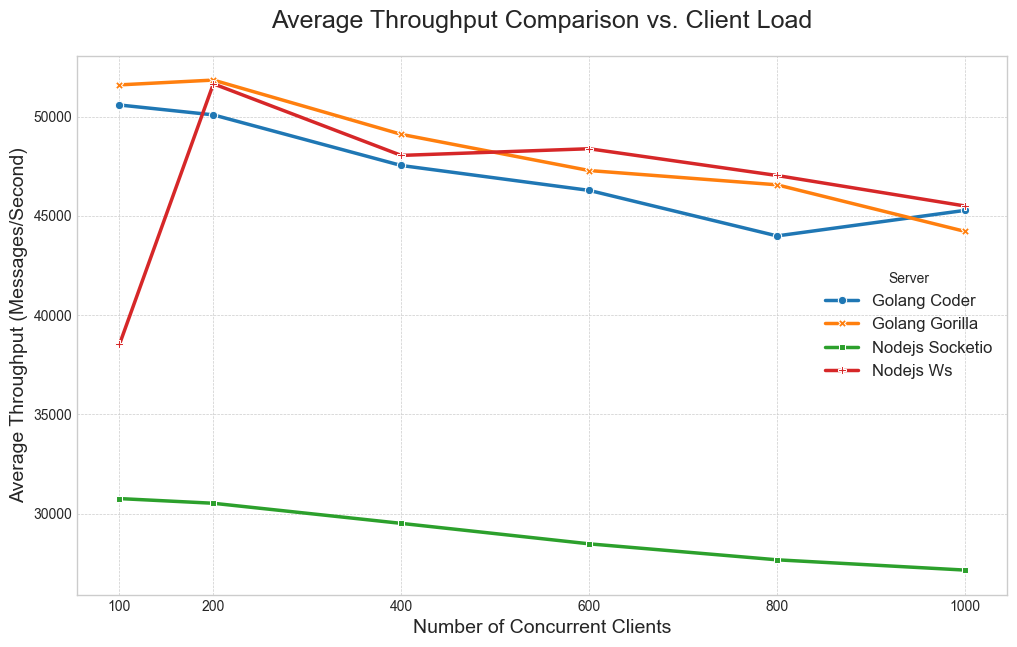

In [7]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=throughput_summary, x='client_load', y='mean', hue='server', style='server', markers=True, dashes=False, lw=2.5)

plt.title('Average Throughput Comparison vs. Client Load', fontsize=18, pad=20)
plt.xlabel('Number of Concurrent Clients', fontsize=14)
plt.ylabel('Average Throughput (Messages/Second)', fontsize=14)
plt.legend(title='Server', fontsize=12)

plt.xticks(CLIENT_LOADS)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("throughput_comparison.png")
plt.show()

### #6 - Metric 3 Analysis: Connection Time
#### Calculating descriptive statistics and creating visualizations for the Connection Time (ms) metric.

In [8]:
conn_summary = conn_df.groupby(['server', 'client_load'])['CONNECTION_TIME_MS'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

print("--- Connection Time Statistics Summary ---")
print(conn_summary)

--- Connection Time Statistics Summary ---
             server  client_load        mean    median         std    min  \
0      Golang Coder          100    5.355430    5.2295    2.705327  0.901   
1      Golang Coder          200   10.683120    9.7230   10.728523  0.901   
2      Golang Coder          400   17.567020   16.9050    9.609795  0.932   
3      Golang Coder          600   23.696947   23.7750   12.916861  0.916   
4      Golang Coder          800   35.009960   33.7620   20.268656  0.939   
5      Golang Coder         1000   42.931205   41.2760   25.286212  0.909   
6    Golang Gorilla          100    5.411080    5.2090    2.944540  1.014   
7    Golang Gorilla          200    9.506100    9.6870    5.034041  0.917   
8    Golang Gorilla          400   17.442158   19.0235    9.266241  0.840   
9    Golang Gorilla          600   19.491502   18.8040    9.877940  1.049   
10   Golang Gorilla          800   26.054088   24.5630   14.520702  0.875   
11   Golang Gorilla         1000 

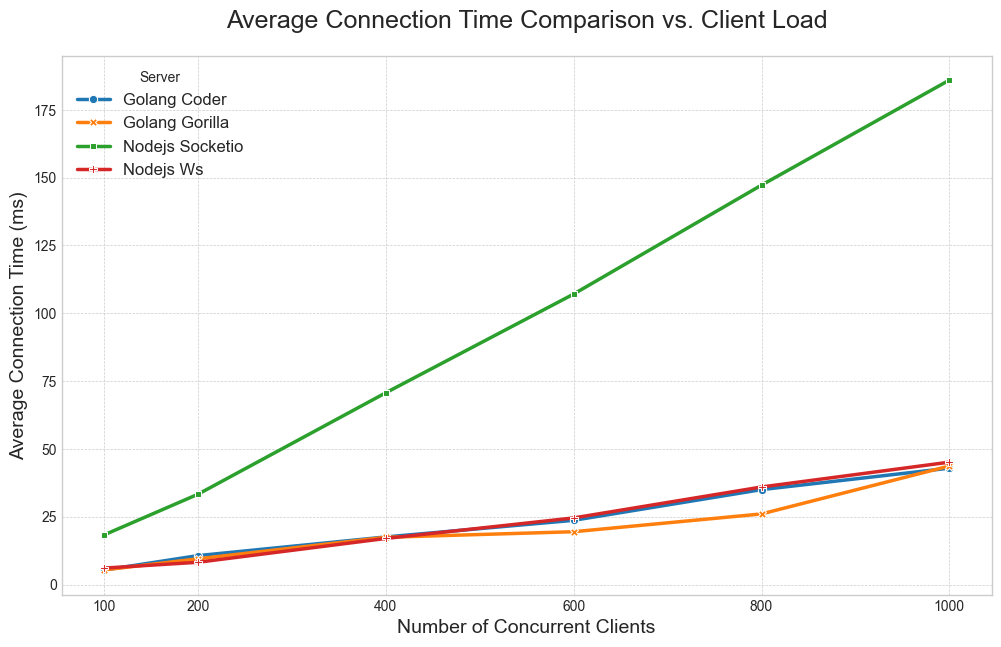

In [9]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=conn_summary, x='client_load', y='mean', hue='server', style='server', markers=True, dashes=False, lw=2.5)

plt.title('Average Connection Time Comparison vs. Client Load', fontsize=18, pad=20)
plt.xlabel('Number of Concurrent Clients', fontsize=14)
plt.ylabel('Average Connection Time (ms)', fontsize=14)
plt.legend(title='Server', fontsize=12)

plt.xticks(CLIENT_LOADS)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("connection_time_comparison.png")
plt.show()